In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [352]:
from util import CHARACTERIZATION_FILE
#reads projects from Excel file
df = pd.read_excel(CHARACTERIZATION_FILE, keep_default_na=False)
len(df)
df.head()

,Projects,Domains,Aerospike,Essbase,Kdb+,Firebase,HBase,Oracle,FileMaker,Hazelcast,...,BigQuery,H2,MarkLogic,Firebird,Realm,Informix,CouchDB,Memcached,dBASE,MS Access
0,Activiti,automation,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,brackets,software development,0,0,1,0,0,0,0,0,...,0,1,1,0,1,1,1,0,0,0
2,ace,software development,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
3,ansible,infrastructure management,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,awx,infrastructure management,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [353]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

H2               161
MySQL            115
PostgreSQL       110
Oracle           110
Realm            110
CouchDB           96
SQLite            95
Redis             88
MongoDB           73
Memcached         70
Aurora            59
Hive              54
Presto            49
Elasticsearch     47
Cassandra         43
IBM DB2           40
MariaDB           40
DynamoDB          35
MS SQL Server     34
Redshift          33
MS Cosmos DB      31
InfluxDB          30
SAP HANA          30
Couchbase         29
BigQuery          27
Firebase          27
Kdb+              22
HBase             21
Interbase         21
SAP ASE           19
Derby             19
Riak KV           17
Firebird          16
dBASE             15
Ingres            15
Teradata          14
Neo4j             13
Informix          13
MS Access         11
Datastax          11
Vertica            7
FileMaker          7
Greenplum          6
MarkLogic          6
Ehcache            6
Netezza            5
HyperSQL           5
Hazelcast    

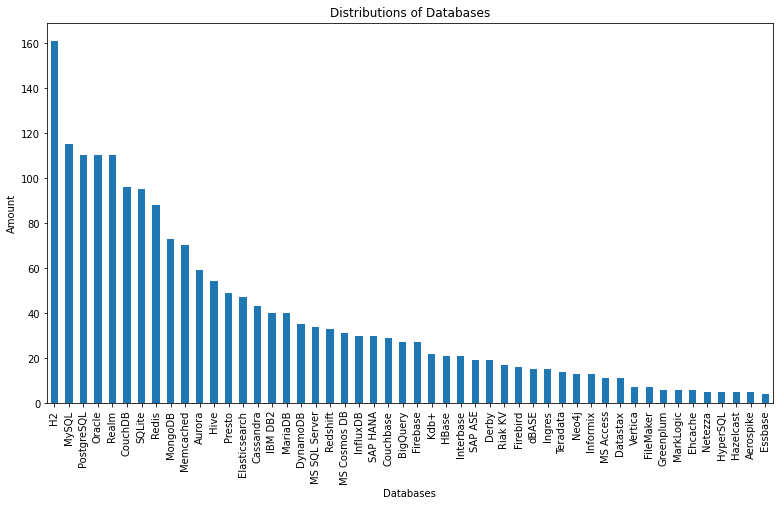

In [355]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Databases")
plt.xlabel("Databases")
plt.ylabel("Amount")
plt.show() 

<AxesSubplot:title={'center':'Histogram - Frequency distributions of Databases'}, ylabel='Frequency'>

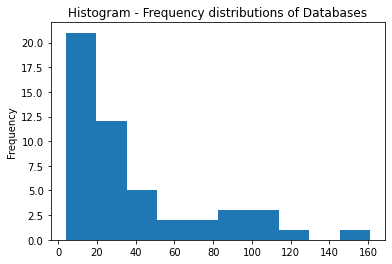

In [327]:
df.iloc[: , 2:].sum().plot(kind='hist', title="Histogram - Frequency distributions of Databases")

In [328]:
df.Domains.value_counts()

software development         15
infrastructure management    13
cms                          13
media                        13
monitoring                   12
communication                11
game                         11
operating system             11
application container        10
file management               8
security                      8
package management            8
scm                           8
collaboration                 6
e-commerce                    6
network                       5
program analysis              5
machine learning              4
cryptocurrency                4
automation                    3
hpc                           2
erp                           2
Name: Domains, dtype: int64

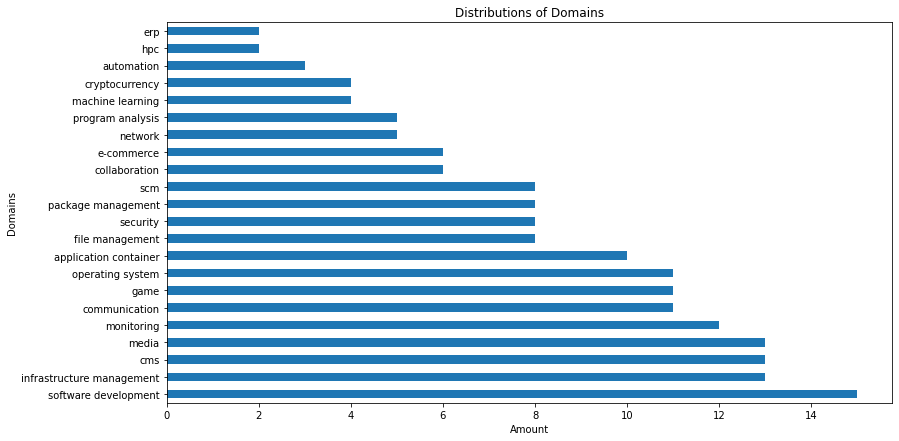

In [343]:
plt.figure(figsize=(13,7))
df.Domains.value_counts().plot(kind='barh', title = 'Distributions of Domains')
plt.xlabel("Amount")
plt.ylabel("Domains")
plt.show() 

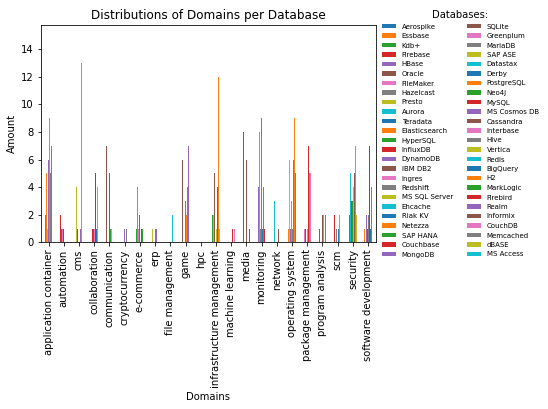

In [330]:
df.groupby(df.Domains).sum().plot(kind='bar')
plt.legend(title = "Databases:", frameon=False, ncol=2, prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Distributions of Domains per Database")
plt.ylabel("Amount")
plt.show() 

In [344]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.head()

,Projects,Domains,Aerospike,Essbase,Kdb+,Firebase,HBase,Oracle,FileMaker,Hazelcast,...,H2,MarkLogic,Firebird,Realm,Informix,CouchDB,Memcached,dBASE,MS Access,SumPerProject
0,Activiti,automation,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,7
1,brackets,software development,0,0,1,0,0,0,0,0,...,1,1,0,1,1,1,0,0,0,11
2,ace,software development,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,11
3,ansible,infrastructure management,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,15
4,awx,infrastructure management,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,8


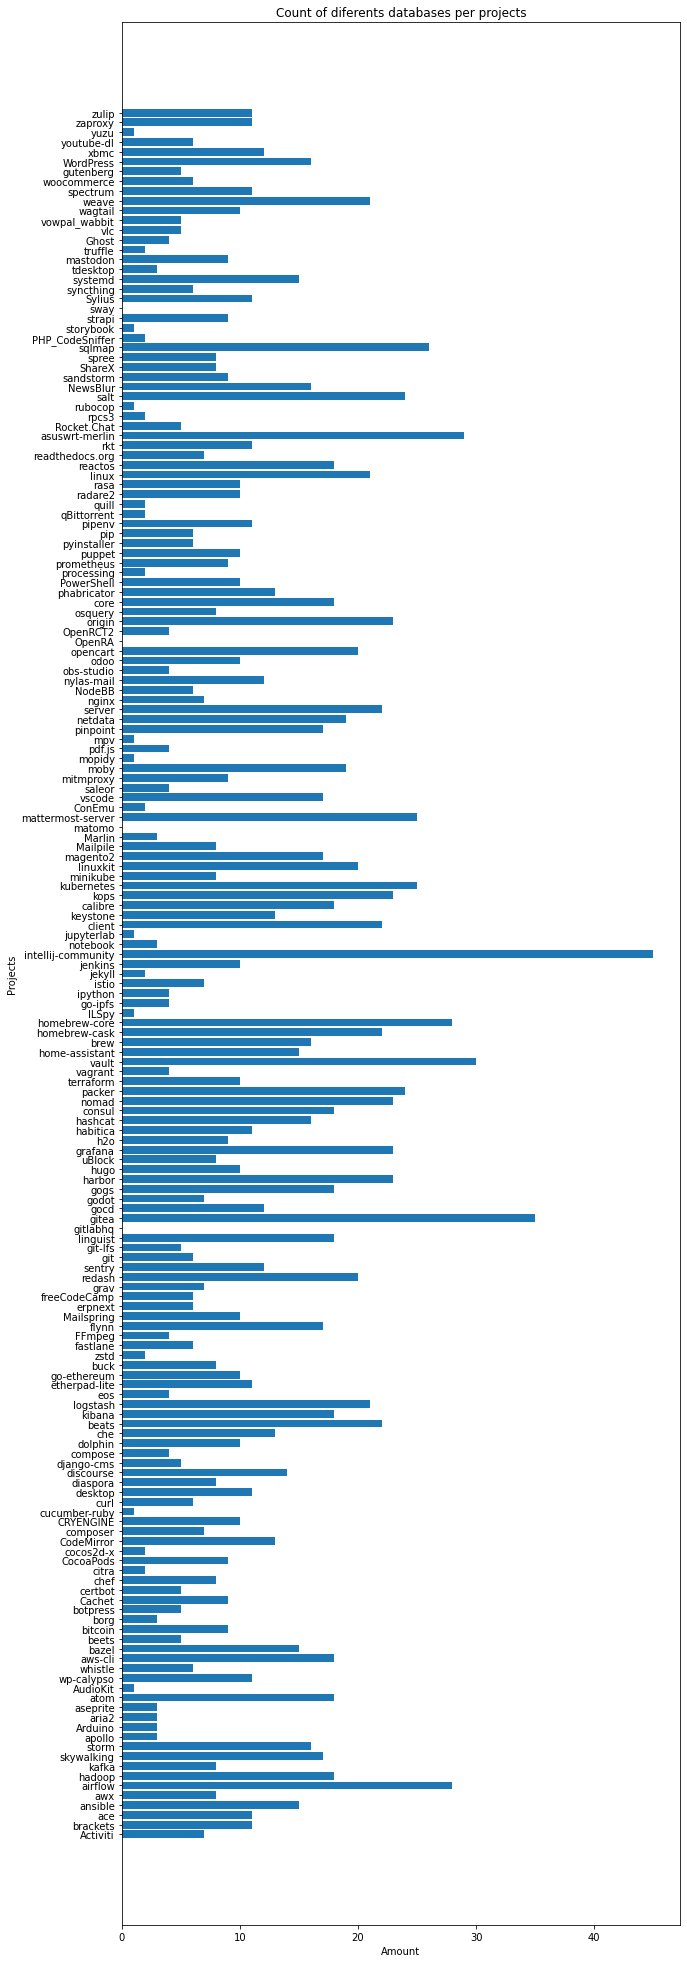

In [347]:
plt.figure(figsize=(10,35))
plt.barh(df.Projects, df.SumPerProject)
plt.title("Count of diferents databases per projects")
plt.xlabel("Amount")
plt.ylabel("Projects")
plt.show()